<a href="https://colab.research.google.com/github/gayatri-2005/Machine-Learning-/blob/main/Simple_Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('height-weight.csv')

Text(0.5, 1.0, 'Weight vs Height')

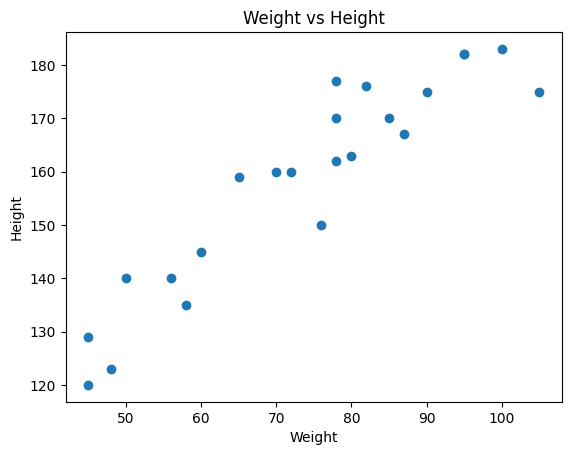

In [ ]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height')

In [ ]:
X=df[['Weight']] #independent feature
y=df['Height']  #dependent feature


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

Text(0, 0.5, 'Height')

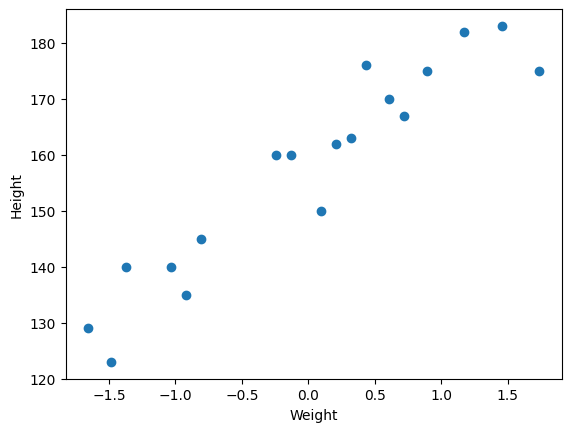

In [ ]:
#Standadization of data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
plt.scatter(X_train_scaled,y_train)
plt.xlabel('Weight')
plt.ylabel('Height')

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
print("The slope or coefficient weight",lr.coef_)
print("The intercept",lr.intercept_)

The slope or coefficient weight [17.03440872]
The intercept 157.5


Text(0, 0.5, 'Height')

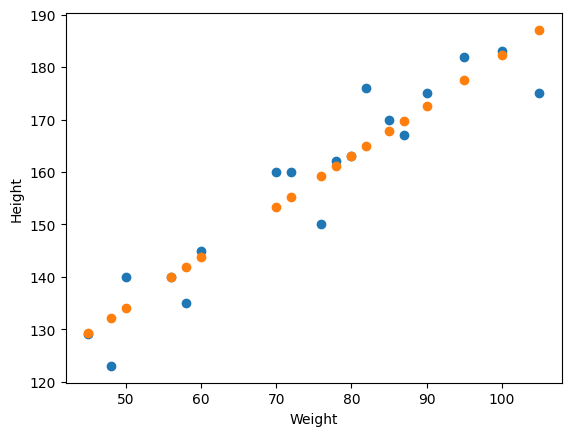

In [23]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,lr.predict(X_train_scaled))
plt.xlabel('Weight')
plt.ylabel('Height')

In [24]:
# Perfromance metrics

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_pred=lr.predict(X_test_scaled)
print("R2 score",r2_score(y_test,y_pred))
print("Mean absolute error",mean_absolute_error(y_test,y_pred))
print("Mean squared error",mean_squared_error(y_test,y_pred))


R2 score 0.776986986042344
Mean absolute error 9.822657814519232
Mean squared error 109.77592599051664


In [25]:
scaled_weight = sc.transform([[80]])
scaled_weight

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [26]:
scaled_weight[0]

array([0.32350772])

In [30]:
print("The height prediction for weight 80kg is",lr.predict([scaled_weight[0]]))

The height prediction for weight 80kg is [163.01076266]


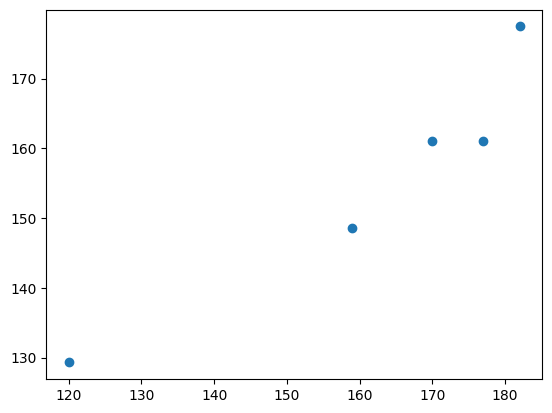

In [31]:
#Assumptions

plt.scatter(y_test,y_pred)  #If linear , you have done good job

/tmp/ipython-input-2252949483.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='Height', ylabel='Density'>

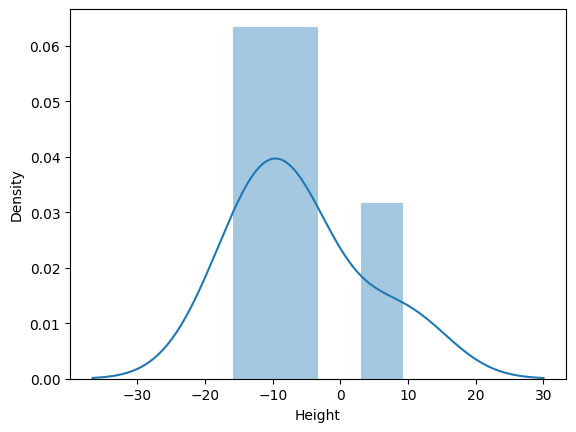

In [33]:
residuals = y_pred-y_test
residuals
sns.distplot(residuals)

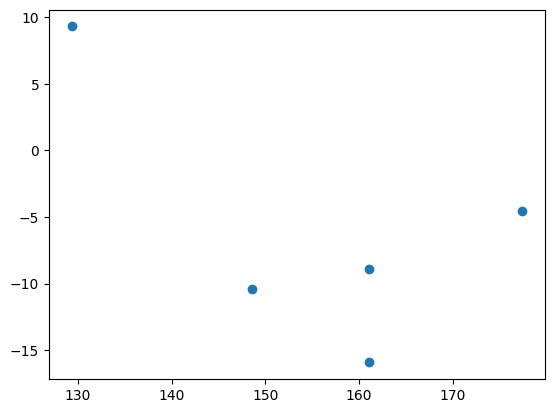

In [34]:
plt.scatter(y_pred,residuals) #if this follows unifrom distribution your  model is so good